In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
plt.rcParams['figure.figsize'] = (10,10)
prd = pd.read_json('sosanhgia20200803_023228.txt', lines=True)
prd.dropna()
prd = prd[prd['highest_price'] > '0']
prd

,link,category,name,img_url,brand,short_desc,priority_price,priority_store,num_of_product,num_of_store,lowest_price,highest_price
0,https://www.sosanhgia.com/p186133-laptop-hp-pa...,"[Máy tính - Thiết bị VP, Laptop, Laptop HP]",Laptop HP Pavilion 15-CS3060TX 8RJ61PA,https://img.sosanhgia.com/images/500x0/b54bfba...,HP,Bộ VXL: Core i5 1035G1 1.0Ghz-6Mb\n - Cạc đồ ...,17.100.000,Shopee,19.0,14.0,16.790.000,18.290.000
1,https://www.sosanhgia.com/p2884-macbook-air-md...,"[Máy tính - Thiết bị VP, Laptop, Macbook]",Macbook AIR MD711 11.6inch,https://img.sosanhgia.com/images/500x0/10e76ab...,Apple,,9.900.000,Lazada,5.0,3.0,9.900.000,12.183.024
2,https://www.sosanhgia.com/p5498-macbook-pro-mf...,"[Máy tính - Thiết bị VP, Laptop, Macbook]",Macbook Pro MF839 2015,https://img.sosanhgia.com/images/500x0/53d11ee...,Apple,CPU: Core i5 5257U\n\nRAM/ HDD: 8Gb/ 128Gb SSD...,23.978.740,Fado,4.0,2.0,18.572.680,19.550.202
5,https://www.sosanhgia.com/p37449-macbook-pro-m...,"[Máy tính - Thiết bị VP, Laptop, Macbook]",Macbook pro MD102 13.3inch,https://img.sosanhgia.com/images/500x0/f4b11a4...,Apple,Hệ điều hành: Mac OS Leopard OX 10.5\n\nBộ vi ...,20.886.797,Fado,3.0,2.0,15.163.035,16.186.811
6,https://www.sosanhgia.com/p58775-nguoi-hoc-vie...,"[Sách, Sách Văn Học, Truyện Giả tưởng, Truyện ...",Người Học Việc Của Đội Biệt Kích - Phần 5: Gã ...,https://img.sosanhgia.com/images/500x0/8be6a47...,KHÁC,Cuộc phiêu lưu đầu tiên của Will khi trở thành...,54.990,Tiki,8.0,6.0,54.990,75.500
...,...,...,...,...,...,...,...,...,...,...,...,...
2806,https://www.sosanhgia.com/p8637-quat-ban-asia-...,"[Điện lạnh - Điện gia dụng, Gia dụng gia đình,...",Quạt bàn Asia B16001,https://img.sosanhgia.com/images/500x0/0c75d1f...,ASIA,Sải cánh: 40 cm\n\nĐiện áp: 220V - 50Hz\n\nCôn...,399.000,Lazada,13.0,6.0,399.000,480.000
2807,https://www.sosanhgia.com/p190808-router-wifi-...,"[Máy tính - Thiết bị VP, Thiết bị mạng, Thiết ...",ROUTER WIFI 4G ZTE MF253S 150MB,https://img.sosanhgia.com/images/500x0/7e9939c...,ZTE,+ Donwload: 100 Mbps/ Upload : 50 Mbps\n + Hỗ ...,789.000,Shopee,23.0,4.0,789.000,1.099.000
2808,https://www.sosanhgia.com/p180373-dau-oliu-bek...,"[Thực phẩm, Dầu ăn, Dầu ăn Beksul]",Dầu Oliu Beksul,https://img.sosanhgia.com/images/500x0/e88d625...,Beksul,,121.000,Lazada,9.0,2.0,121.000,145.000
2811,https://www.sosanhgia.com/p206847-dau-me-beksu...,"[Thực phẩm, Dầu ăn, Dầu ăn Beksul]",DẦU MÈ BEKSUL 500ML,https://img.sosanhgia.com/images/500x0/fbff8f5...,Beksul,,259.000,Lazada,2.0,2.0,259.000,358.800


In [33]:
category_name = []
category_count  = []
for x in prd.category:
    value = x[0]
    if value in category_name: category_count[category_name.index(value)]+=1 
    else: 
        category_name.append(value)
        category_count.append(1)

category = list(zip(category_name,category_count))
dp = pd.DataFrame(data=category, columns=['Loại hàng', 'ố lượng'])
dp

,Loại hàng,ố lượng
0,Máy tính - Thiết bị VP,32
1,Sách,1579
2,Kỹ thuật số,18
3,Sức khỏe - Làm đẹp,160
4,Nhà cửa đời sống,31
5,Điện tử,3
6,Điện lạnh - Điện gia dụng,29
7,Văn phòng phẩm,4
8,Mẹ và Bé,9
9,Thời trang,2


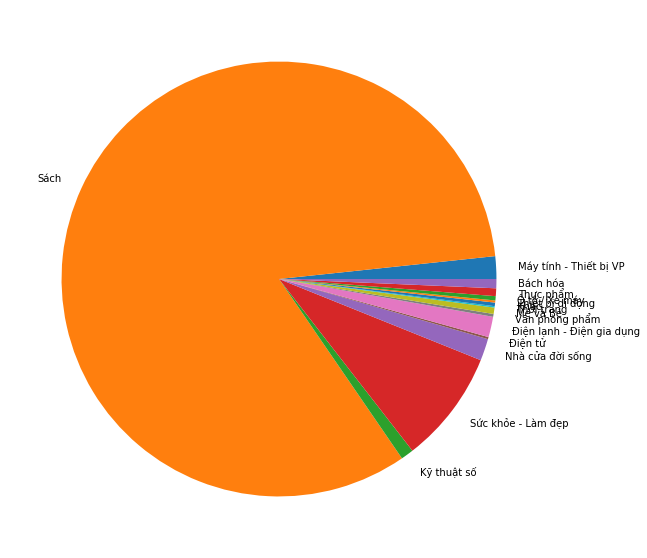

In [4]:
plt.pie(dp['Số lượng'], labels = dp['Loại hàng'])
plt.show()

In [16]:
store_name = []
store_count  = []
for x in prd.priority_store:
    value = x
    if value in store_name: store_count[store_name.index(value)]+=1 
    else: 
        store_name.append(value)
        store_count.append(1)

priority_store = list(zip(store_name,store_count))
dp = pd.DataFrame(data=priority_store, columns=['Shop', 'Số lượng'])
dp

,Shop,Số lượng
0,Shopee,684
1,Lazada,349
2,Fado,3
3,Tiki,795
4,MediaMart,1
5,Bookbuy,6
6,Vinabook,6
7,FAHASA,20
8,Sendo,30
9,Phương Nam Book,2


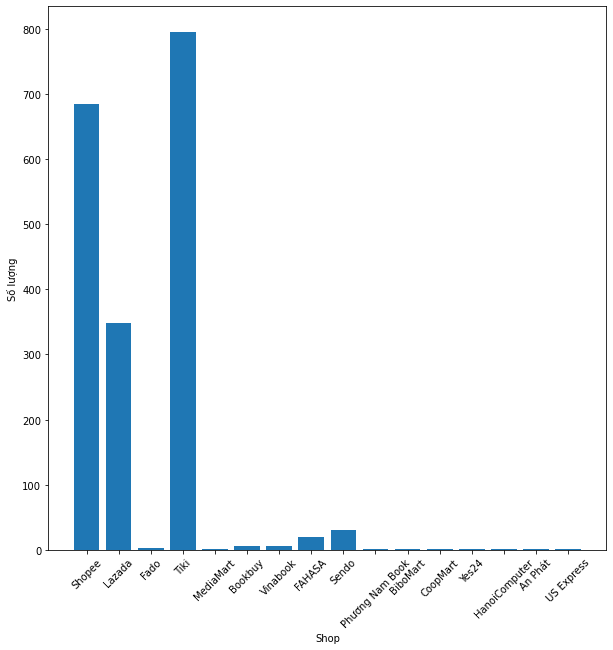

In [21]:
plt.bar(dp['Shop'], dp['Số lượng'])
plt.xlabel('Shop')
plt.ylabel('Số lượng')
plt.xticks(rotation = 45)
plt.show()

AttributeError: 'str' object has no attribute 'category'